# Plotting with Seaborn

Seaborn is a plotting package that leverages the power of Matplotlib, but specializes and refines that interface to support visualization of tabular data and their statistical properties.  By convention, seaborn is imported as ```sns```, a module that contains a variety of different plotting functions, as outlined <a href="https://seaborn.pydata.org/api.html">here</a>.

Let's do some initial imports.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

It turns out that the seaborn package contains some sample datasets that can be loaded using the ```sns.load_dataset``` function. (If you want to find out what datasets are available, you can call ```sns.get_dataset_names()```.)  Many of the examples in the <a href="https://seaborn.pydata.org/tutorial.html">Official seaborn tutorial</a> use the "tips" dataset.)  We're going to load a different one instead, named "mpg", which contains information about different car models and how their mpg rating (miles per gallon) relates to other vehicle characteristics.

### Step 1.

* Load the "mpg" dataset from sns and assign it to the variable ```mpg```.  This loads the data into a pandas dataframe.  Take a peek at the data using the ```head()``` method. Note: Use the way the "tips" dataset is loaded in the <a href="https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots">Relating variables with scatter plots</a> tutorial as a reference for how you can load the "mpg" dataset.

In [2]:
mpg = sns.load_dataset('mpg')
mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


As you can see, one of the columns in the dataframe is the "name" of the car, which combines information about both the make (manufacturer) of the car, and the model.  It would be helpful to separate out the information just about the make, and insert that in a new column in the dataframe.  While this is more about how to manipulate pandas dataframes than it is about plotting them using seaborn, you might be interested in the little bit of code below that applies a function to each row of the "name" column to create a new column called "make", by splitting the name string into a list of words and then extracting the first element of that list which contains the make.  The function that we're applying to each row does not have a name, but is created on the fly using the <a href="https://docs.python.org/3/tutorial/controlflow.html?highlight=lambda#lambda-expressions">Python lambda keyword</a>.  More information about applying functions to pandas dataframes can be found <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html">here</a>.

* Execute the code cell below and then take another peek using the ```head``` method to verify that a new column called "make" has been added to the dataframe.

In [3]:
mpg['make'] = mpg['name'].apply(lambda s: s.split()[0])
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,make
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


### Step 2.

The ```sns.relplot``` function makes scatterplots between pairs of datasets, like the ```plt.scatter``` function in matplotlib, but is focused more on data in dataframes, allowing for more than two data columns to be represented in a scatterplot.  
* Use ```sns.relplot``` to make a scatterplot of the "horsepower" (on the x-axis)  vs. "mpg" (on the y-axis) columns of the mpg dataframe. To do this you will need to specify the arguments ```x``` and ```y``` with the strings that correspond to the variable names and the argument ```data``` with the source data frame. You should notice that there is generally an inverse relationship between the two: cars with higher horsepower tend to get lower gas mileage (mpg).

Look <a href="https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots">here</a> for some tutorial material and documentation on the ```relplot``` function.


## Graded Cell

This cell is worth 40% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="seabornstep2.png" width=300 height=300  align="left"/>


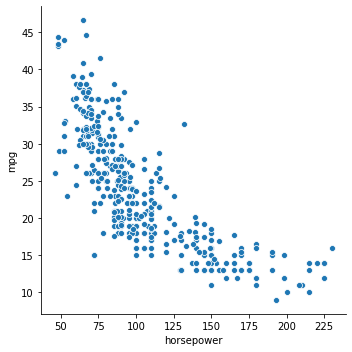

In [4]:
sns.relplot(x='horsepower',y='mpg', data = mpg)

### Step 3.

As noted, the ```sns.relplot``` function can be called with additional options to overlay other data onto the basic scatterplot that relplot provides.  For example, the ```hue``` option can be passed with another column name in the dataframe, and points in the scatterplot are colored according to a heatmap applied to the specified column ("hue" is a synonym for "color").

* Use ```sns.relplot``` to make a scatterplot of the "mpg" vs. "horsepower" columns of the mpg dataframe, but now color the data points according to the model year using the `hue` option (use the <a href="https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots">Relating variables with scatter plots</a> tutorial as a reference for how to properly apply the `hue` option). You should notice that there is a systematic trend with model_year, as high-horsepower / low-mpg cars are replaced by lower-horsepower / high-mpg cars. This was generally in response to increased fuel prices and gas shortages during the 1970s.



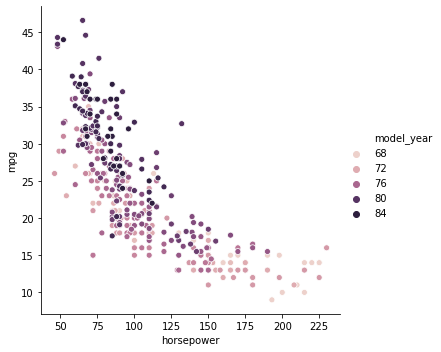

In [5]:
sns.relplot(x='horsepower',y='mpg', data = mpg, hue = "model_year")

### All pairwise data relationships

In the plots above, we examined the relationship between "mpg" and "horsepower" (with information about "model_year" as well).  It is often useful to be able to visualize all pairwise data relationships in a dataset containing multiple columns.  Fortunately, seaborn provides a convenient function for summarizing such relationships.

Before making such a plot, however, it will be useful to clean up the ```mpg``` dataframe a little bit, since there is a small amount of missing data.  Specifically, examine the output of ```mpg.info()``` in the code cell below (execute the code cell to view the output).  You should notice that while most data columns contain 398 non-null entries, the horsepower column contains only 392.  We were able to make the scatterplots above even with the missing horsepower data, but the absence of those data will generate some warnings in the plots below.

In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
 9   make          398 non-null    object 
dtypes: float64(4), int64(3), object(3)
memory usage: 31.2+ KB


Let's use the ```dropna()``` method on the dataframe to remove those rows where we are missing some data.  The option ```inplace=True``` instructs the method to modify the mpg dataframe as is, rather than generating a new dataframe that we must assign to a variable.  Execute the code cell below.

In [7]:
mpg.dropna(inplace=True)

### Step 4.

The function ```sns.pairplot``` will produce a square panel of plots: the off-diagonal elements of the panel will show pairwise scatterplots of each pair of data columns, and the diagonal elements will show histograms for the distribution of data in each column.

* Use the ```sns.pairplot``` function to generate a pairwise panel for the ```mpg``` dataframe.
* Spend some time examining the plots: there is a lot that is represented here.  Locate the plot of mpg vs. horsepower that we made previously.  Examine the plot of mpg vs. model_year to see how gas mileage steadily progressed throughout the time period in question, although with a large amount of variation in mpg in any given model year.
* Note that some quantities show a positive correlation with each other, while others show a negative correlation, or very little correlation at all.  We'll return to that issue shortly.
* Some of the data relationships seem a bit surprising.  For example, acceleration is inversely associated with horsepower.  One might expect that a car with more horsepower would be able to achieve greater accelerations, but horsepower is also strongly correlated with weight.

You can find examples of ```sns.pairplot``` in both the <a href="https://seaborn.pydata.org/tutorial/axis_grids.html#plotting-pairwise-data-relationships">Plotting pairwise data relationships</a> tutorial and the <a href="https://seaborn.pydata.org/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset">Visualizing pairwise relationships in a dataset</a> tutorial. Note: for the purposes of this activity you will not need to apply ```hue```, ```height```, or any other options to your plot.

## Graded Cell

This cell is worth 30% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this:<br><img src="seabornstep4.png" width=300 height=300  align="left"/>

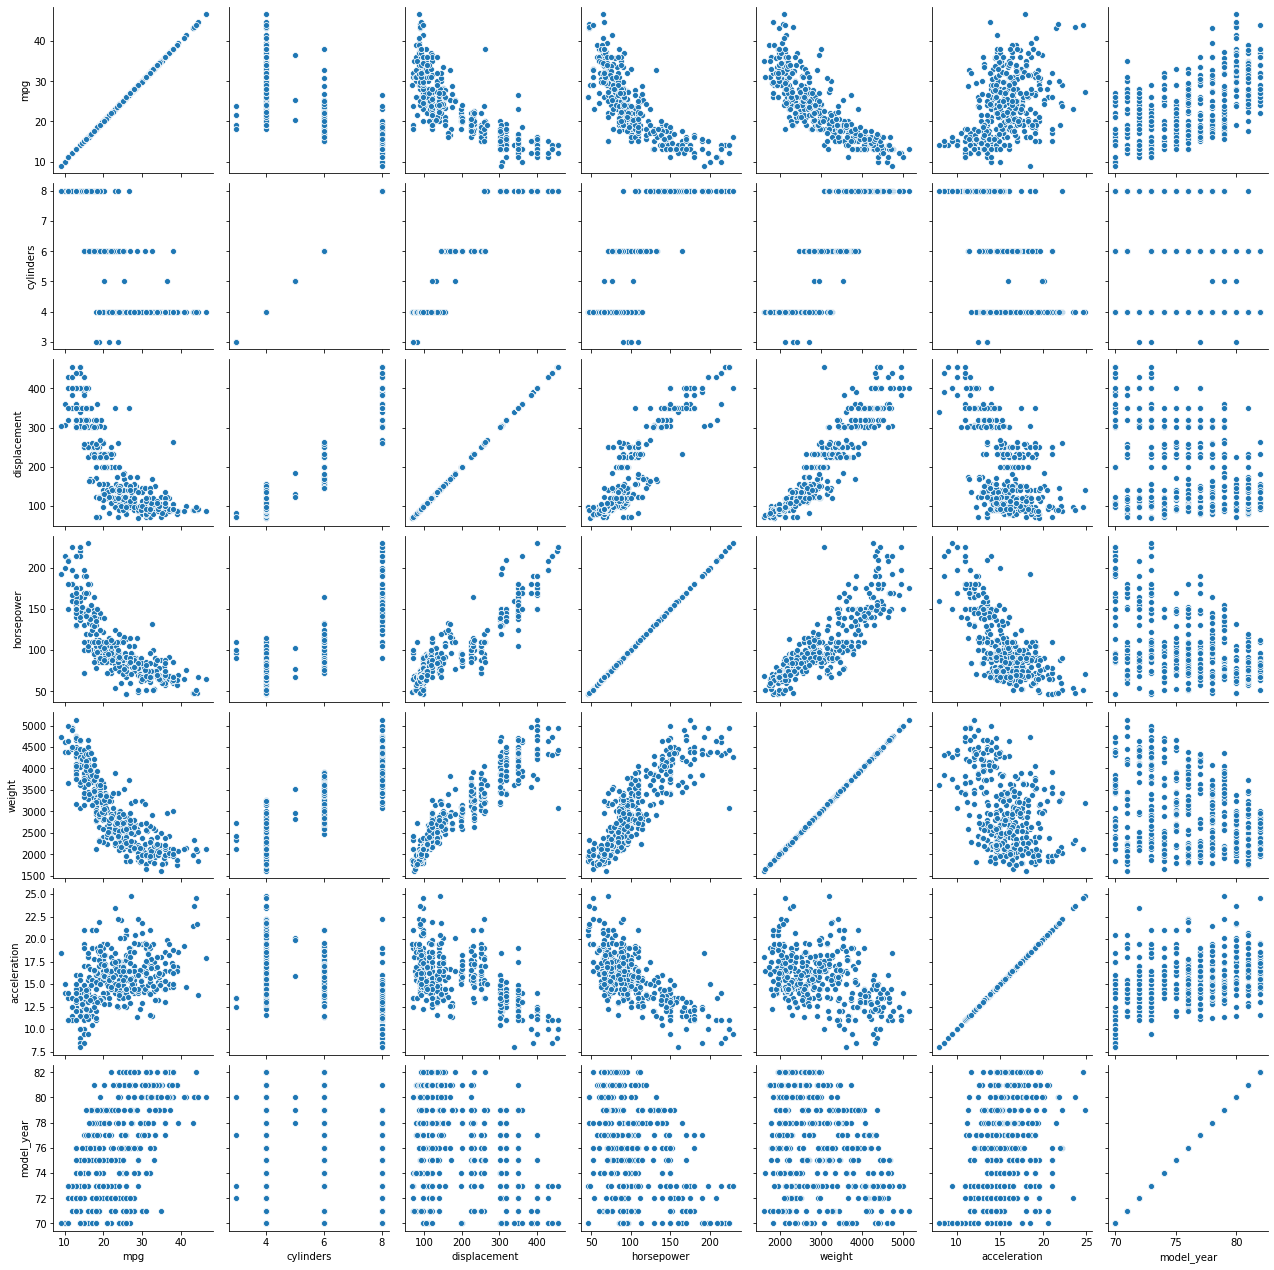

In [8]:
g = sns.PairGrid(mpg)
g.map(sns.scatterplot)

### Pairwise data correlations

We noted that there were a variety of different pairwise correlations apparent in the panel figure above.  It would be useful to distill down that information in a more compact summary.  We can do that with two sequential steps.

* For a given dataframe, the ```corr()``` method computes the pairwise correlation of the columns of the dataframe, e.g., ```mpg.corr()``` for our mpg dataset.  Each pair of columns in the dataframe, corresponding to one of the scatterplots in the figure above, is replaced by a single number, ranging from 1.0 if the two columns are perfectly correlated to -1.0 if the columns are perfectly anti-correlated.
* The ```sns.heatmap``` function plots rectangular data as a color-encoded matrix.  Because we can use the ```mpg.corr()``` method to compute the correlation for each pair of columns, we can use the ```sns.heatmap``` function to plot those correlations.


### Step 5.

* Use the ```corr()``` method to compute pairwise correlations of the mpg columns, and assign that to a variable named ```mpg_corr```.  
* Examine the new dataframe ```mpg_corr``` by entering and executing the expression ```mpg_corr```.  (Alternatively, you could enter ```print(mpg_corr)```, but as we've seen previously, dataframes are rendered more nicely in Jupyter notebooks when we examine them directly rather than running them through the ```print``` function.)
* You should notice that the index and columns of ```mpg_corr``` are the same, since they reflect all pairwise combinations of columns in the original ```mpg``` dataset, resulting in a 2D matrix of correlations.  All the correlations on the diagonal are equal to 1, since each column is perfectly correlated with itself, and the correlation matrix is symmetric about the diagonal since correlation between two datasets is independent of the order in which we consider them.

In [9]:
mpg_corr = mpg.corr()
print(mpg_corr)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   

              acceleration  model_year  
mpg               0.423329    0.580541  
cylinders        -0.504683   -0.345647  
displacement     -0.543800   -0.369855  
horsepower       -0.689196   -0.416361  
weight           -0.416839   -0.309120  
acceleration      1.000000    0.290316  
model_year        0.290316    1.000000  


### Step 6.

* Now that you've distilled all the pairwise data originally contained in the scatterplots down to a matrix of pairwise correlations, we can view those correlations with ```sns.heatmap```.
* Use the ```sns.heatmap``` function to plot the pairwise correlations by passing ```mpg_corr``` as an argument to the heatmap function.  In addition, the heatmap function has an optional argument ```annot```, and if that is set to ```True```, each cell of the heatmap is annotated by the numerical value in that cell (as well as being color-coded by the heatmap). Include the option ```annot=True``` in your function call to include those numerical values.
* Examine the resulting heatmap, and visually confirm that some of the correlations/anti-correlations that you observed in the pairwise scatterplots are reflected in the correlation heatmap. You should notice that the annotated number in each cell corresponds to the data you examined in ```mpg_corr``` above (although rounded to fewer decimal places).

You can find examples of ```sns.heatmap``` and the application of the optional  ```annot``` argument in the <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap">seaborn.heatmap</a> documentation.

## Graded Cell

This cell is worth 30% of the grade for this assignment. <i>Note: a self-check will not accompany this assignment</i><br>
Your plot should look like this: <br><img src="seabornstep6.png" width=400 height=400  align="left"/>

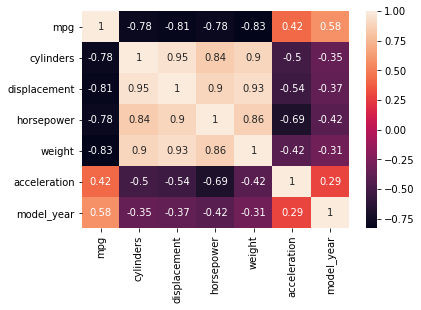

In [10]:
sns.heatmap(mpg_corr, annot = True)

### Representing variation in a dataset

While scatterplots reveal all of the variation in a dataset, it is often useful to summarize that variation by some other means, such as using error bars, histograms, confidence intervals, or box-and-whisker plots.

### Step 7.

We saw previously, for example, that mpg generally increased with model_year, although with substantial variation within each model_year.  We can capture that more succinctly with the ```sns.boxplot``` function.  A boxplot (or box-and-whisker plot) draws a box representing the inner quartiles of the distribution (25%-75%, with the median drawn as a line within the box) and whiskers showing the extent of the distribution outside of the box, potentially with outliers represented by discrete markers.

* Use the ```sns.boxplot``` function to visualize the "mpg" variable's intra-year variation on the y-axis, as a function of "model_year" on the x-axis." 

Examine the <a href="https://seaborn.pydata.org/generated/seaborn.boxplot.html">online documentation</a> for ```sns.boxplot``` to see how you can specify a dataframe to plot from, as well as columns to use for the x and y axes of the boxplot.  (The strings corresponding to the column names of interest are passed into the x and y arguments, as previously with ```sns.relplot```.)

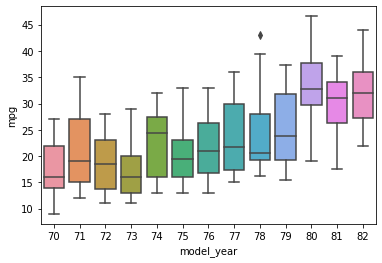

In [11]:
sns.boxplot(x="model_year", y="mpg", data=mpg)

### Step 8.

The ```sns.lineplot``` function can also be used to represent the sort of statistical variation we viewed in the preceding boxplot.  A lineplot, by default, aggregates over multiple y values at each value of x, plotting an estimate of the data (by default, the mean over y values for each x), as well as a confidence interval for that estimate (by default, a 95% confidence interval).  It turns out that the same sort of lineplot can be generated using the ```sns.relplot``` function we previously used, by specifying the ```kind="line"``` option rather than the default kind of scatter.

* Use the ```sns.lineplot``` function to visualize the "mpg" data and its intra-year variation as a function of "model_year", specifying a 99% confidence interval instead of the default 95%.

You can find examples of ```sns.lineplot``` in the <a href="https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot">seaborn.lineplot</a> documentation.

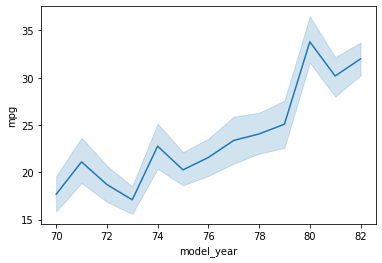

In [12]:
sns.lineplot(x="model_year", y="mpg", data=mpg)

### Plotting categorical data

Seaborn provides various facilities for plotting categorical data, and distributions over such data.  As with relplot, the ```sns.catplot``` function provides a coherent interface to a variety of plotting techniques that can be selected using the ```kind``` option.

### Step 9.

Since we went to all the trouble above to add a new column to the mpg dataframe (the "make" of each car), let's use the data contained in that column.

* Use the ```sns.catplot``` function to create a boxplot of the distribution of mpg values for each separate make of car.  The ```sns.catplot``` function is similar to the ```sns.boxplot``` function used above, in that you can specify the name of a dataframe to use along with the names of x and y columns of interest.  Since there are a large number of different makes, you might want to use some of the optional arguments to catplot in order to make the figure larger.

Use the <code>kind='box'</code> option to represent the data with box plots.

You can find examples of ```sns.catplot``` in the <a href="https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=catplot#seaborn.catplot">seaborn.catplot</a> documentation. While you will be using the ```kind='box'``` option for your plot, you will find examples of ```kind='violin'``` and ```kind='count'``` on the page linked above.

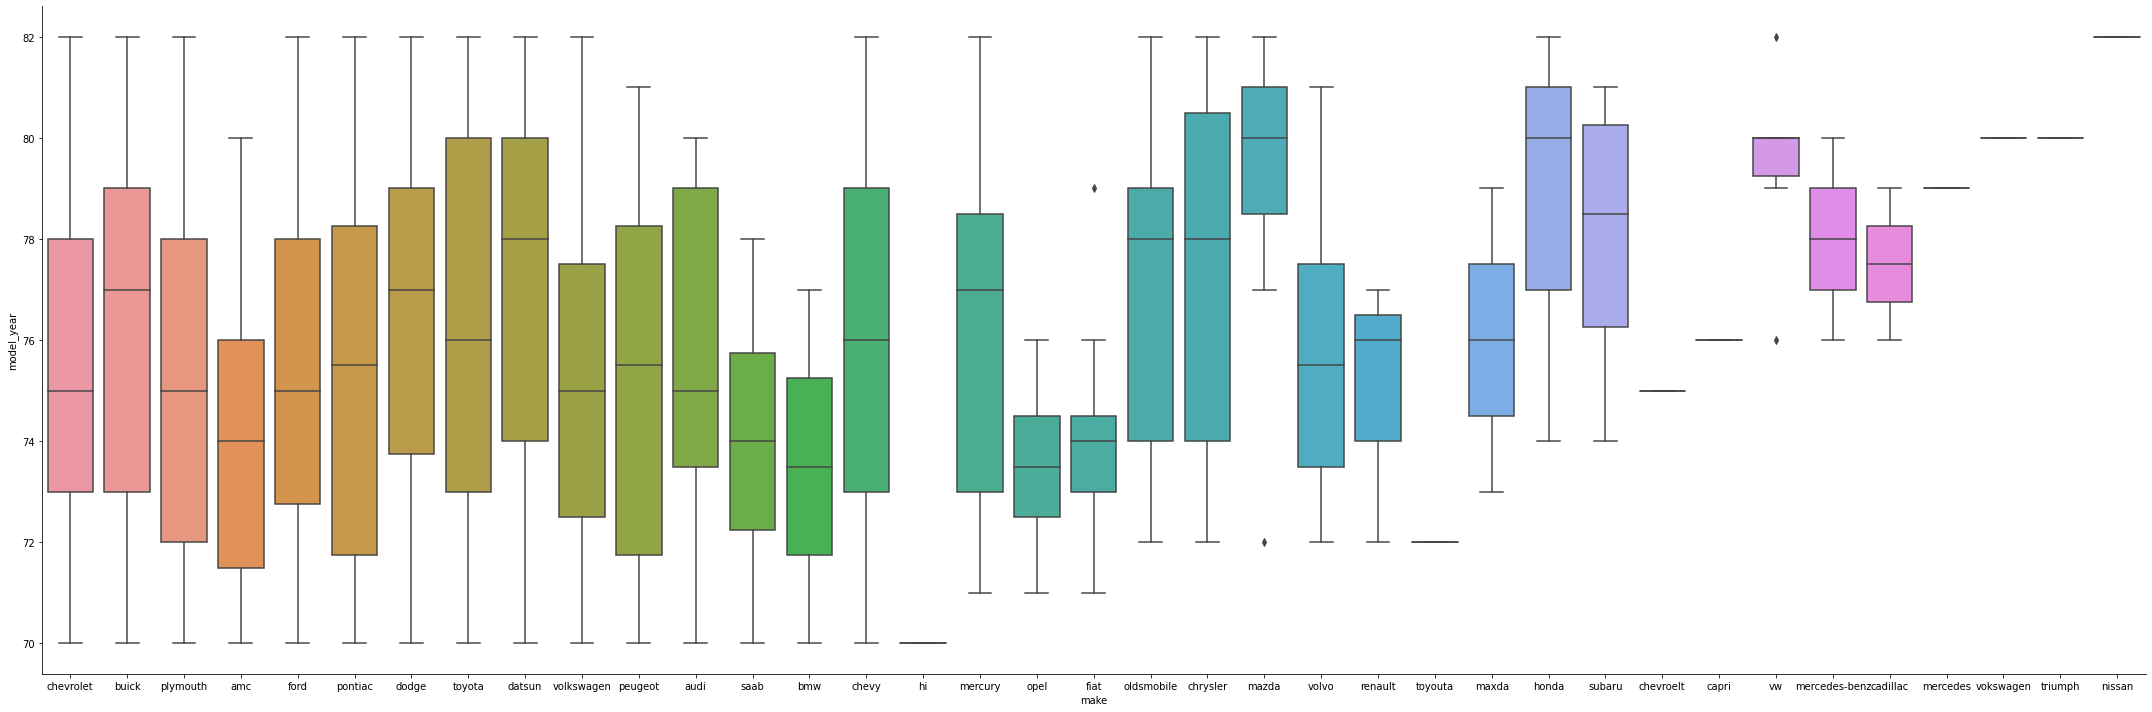

In [13]:
sns.catplot(x="make", y="model_year",data=mpg, kind="box", height=10, aspect=3)